# Brainhack School 2023 Final Project
by Wei-Chen Chang(張瑋宸)

## Data Source:
<a src="https://openneuro.org/datasets/ds002424/versions/1.2.0/download">OpenNeuro</a >

In [1]:
##We need to take a look of the data...
!pwd
!ls

/home/wcnoname5/BHS2023_Project_ADHD
Analysis.ipynb	LICENSE  README.md  data


In [7]:
! ls data/ds002424

CHANGES			  sub-14  sub-35  sub-56  sub-77
README			  sub-15  sub-36  sub-57  sub-78
code			  sub-16  sub-37  sub-58  sub-79
dataset_description.json  sub-17  sub-38  sub-59  task-SLD_bold.json
participants.json	  sub-18  sub-39  sub-60  task-SLD_events.json
participants.tsv	  sub-19  sub-40  sub-61  task-SLI_bold.json
phenotype		  sub-20  sub-41  sub-62  task-SLI_events.json
stimuli			  sub-21  sub-42  sub-63  task-SSD_bold.json
sub-01			  sub-22  sub-43  sub-64  task-SSD_events.json
sub-02			  sub-23  sub-44  sub-65  task-SSI_bold.json
sub-03			  sub-24  sub-45  sub-66  task-SSI_events.json
sub-04			  sub-25  sub-46  sub-67  task-VLD_bold.json
sub-05			  sub-26  sub-47  sub-68  task-VLD_events.json
sub-06			  sub-27  sub-48  sub-69  task-VLI_bold.json
sub-07			  sub-28  sub-49  sub-70  task-VLI_events.json
sub-08			  sub-29  sub-50  sub-71  task-VSD_bold.json
sub-09			  sub-30  sub-51  sub-72  task-VSD_events.json
sub-10			  sub-31  sub-52  sub-73  task-VSI_bold.json
sub-11			  sub-3

Visuao-spatial, Large reward, Delayed/Immediate reward (task-VLD or task-VLI).

In [12]:
#import subprocess

! ls /home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-72/


ses-T1


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

sub = pd.read_csv('/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/participants.tsv', sep='\t')

sub.groupby(by=["ADHD_diagnosis","sex"]).count() #full sample 

samp = sub[pd.notnull(sub.VLD_datetime) & pd.notnull(sub.VLI_datetime)] #sample w/ VLD and VLI
samp[["participant_id","sex","ADHD_diagnosis"]]
samp.groupby(by=["ADHD_diagnosis","sex"]).count()[["participant_id","VLD_datetime","VLI_datetime"]]

participant_id  VLD_datetime  VLI_datetime
ADHD_diagnosis sex                                            
0              1                28            28            28
               2                14            14            14
1              1                30            30            30

In [17]:
ADHD=samp[samp.ADHD_diagnosis==1]['participant_id'].to_numpy()
control_m=samp[(samp.ADHD_diagnosis==0) & (samp.sex==1)]['participant_id'].to_numpy()

Theere're 72 participants that complete VLD and VLI, 42 of them are control participants and 30 participants with ADHD. 28 out of 42 controls are male, and all 30 ADHD participants are male.

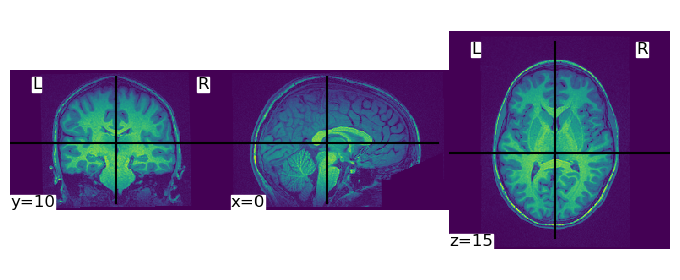

In [14]:
##Check anatomical image
#import nilearn as ni
from nilearn import plotting

sub02 = "/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/anat/sub-02_ses-T1_T1w.nii.gz"
plotting.plot_img(sub02)

In [20]:
!ls /home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/func

sub-02_ses-T1_task-SLD_bold.nii.gz  sub-02_ses-T1_task-VLD_bold.nii.gz
sub-02_ses-T1_task-SLD_events.tsv   sub-02_ses-T1_task-VLD_events.tsv
sub-02_ses-T1_task-SLI_bold.nii.gz  sub-02_ses-T1_task-VLI_bold.nii.gz
sub-02_ses-T1_task-SLI_events.tsv   sub-02_ses-T1_task-VLI_events.tsv
sub-02_ses-T1_task-SSI_bold.nii.gz  sub-02_ses-T1_task-VSI_bold.nii.gz
sub-02_ses-T1_task-SSI_events.tsv   sub-02_ses-T1_task-VSI_events.tsv
